# Save Heart

## Importing the necessary libraries and packages

In [1]:
# loading dataset
import numpy as np
import pandas as pd
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data splitting
from sklearn.model_selection import train_test_split
# search for best hyperparameters
from sklearn.model_selection import GridSearchCV
# classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# accuracy metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, auc, RocCurveDisplay
# model persistence
from joblib import dump

## Importing the csv file as a dataFrame

In [2]:
data = pd.read_csv('../Dataset/save-heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,thal,target
0,63,Male,Severe pain,145,233,>120,150,No,Normal,1
1,37,Male,Moderate pain,130,250,≤120,187,No,Fixed defect,1
2,41,Female,Light pain,130,204,≤120,172,No,Fixed defect,1
3,56,Male,Light pain,120,236,≤120,178,No,Fixed defect,1
4,57,Female,No pain,120,354,≤120,163,Yes,Fixed defect,1


## Exploratory Data Analysis

Formal information about the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       301 non-null    int64 
 1   sex       301 non-null    object
 2   cp        301 non-null    object
 3   trestbps  301 non-null    int64 
 4   chol      301 non-null    int64 
 5   fbs       301 non-null    object
 6   thalach   301 non-null    int64 
 7   exang     301 non-null    object
 8   thal      301 non-null    object
 9   target    301 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 23.6+ KB


Description of the dataset

In [4]:
data.describe()

,age,trestbps,chol,thalach,target
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.299003,131.607973,246.528239,149.873754,0.541528
std,9.025721,17.588608,51.895312,22.810466,0.499102
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.000000,120.000000,211.000000,136.000000,0.000000
50%,55.000000,130.000000,241.000000,153.000000,1.000000
75%,61.000000,140.000000,275.000000,166.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,1.000000


Checking if any null value exists

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
thalach     0
exang       0
thal        0
target      0
dtype: int64

Columns of the dataset

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'thal', 'target'],
      dtype='object')

Correlations between the variables

In [7]:
data.corr()

,age,trestbps,chol,thalach,target
age,1.000000,0.278242,0.223505,-0.394267,-0.235113
trestbps,0.278242,1.000000,0.124597,-0.045761,-0.146228
chol,0.223505,0.124597,1.000000,-0.017706,-0.080962
thalach,-0.394267,-0.045761,-0.017706,1.000000,0.435254
target,-0.235113,-0.146228,-0.080962,0.435254,1.000000


## Data Visualization

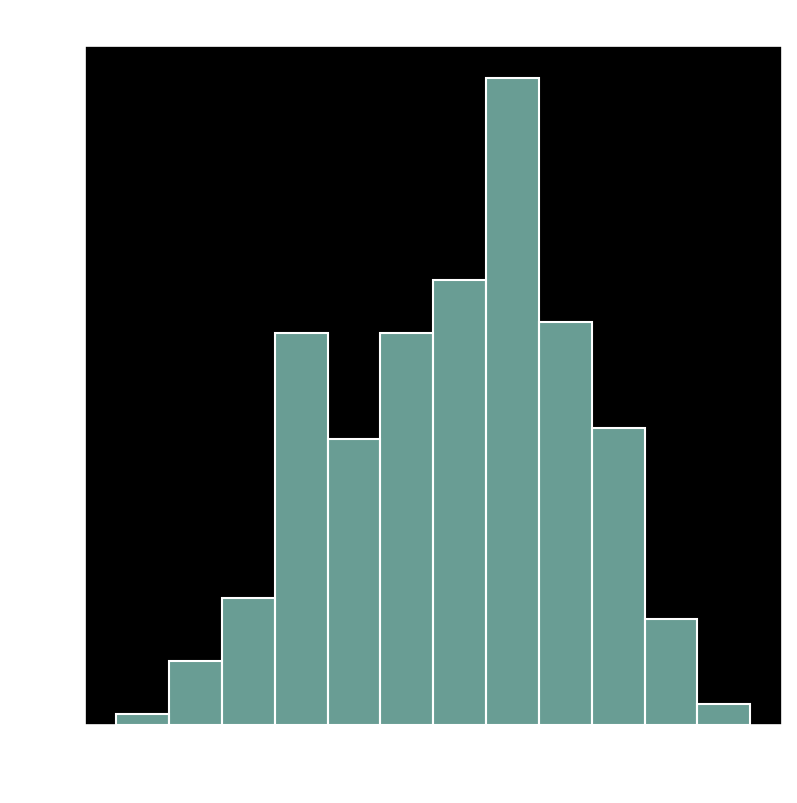

In [8]:
plt.figure(figsize=(6,6), dpi=150)
plt.style.use('dark_background')
plt.title("Histogram of Ages")
sns.histplot(data["age"])
plt.savefig("../media/age_histogram.png", bbox_inches='tight')

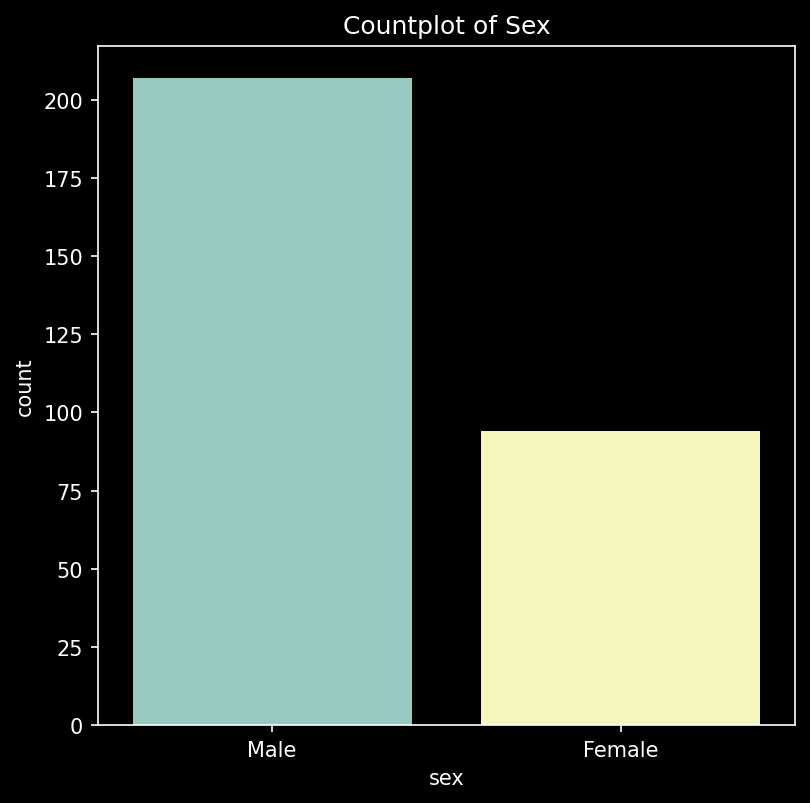

In [9]:
plt.figure(figsize=(6,6), dpi=150)
plt.style.use('dark_background')
plt.title("Countplot of Sex")
sns.countplot(x='sex', data=data)
plt.savefig("../media/sex_countplot.png", bbox_inches='tight')

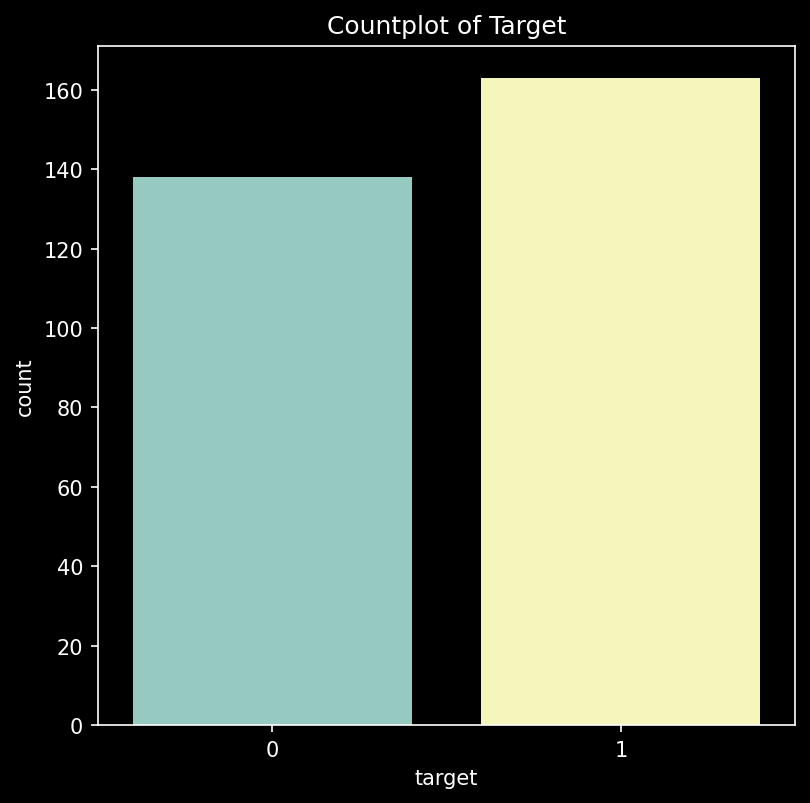

In [10]:
plt.figure(figsize=(6,6), dpi=150)
plt.style.use('dark_background')
plt.title("Countplot of Target")
sns.countplot(x='target', data=data)
plt.savefig("../media/target_countplot.png", bbox_inches='tight')

## Encoding Categorical Data

In [11]:
print(data['sex'].unique())
print(data['cp'].unique())
print(data['fbs'].unique())
print(data['exang'].unique())
print(data['thal'].unique())

['Male' 'Female']
['Severe pain' 'Moderate pain' 'Light pain' 'No pain']
['>120' '≤120']
['No' 'Yes']
['Normal' 'Fixed defect' 'Reversible defect']


In [12]:
data['sex'] = data['sex'].replace({'Male': 1, 'Female': 0})
data['cp'] = data['cp'].replace({'No pain': 0, 'Light pain': 1, 'Moderate pain': 2, 'Severe pain': 3})
data['fbs'] = data['fbs'].replace({'≤120': 0, '>120': 1})
data['exang'] = data['exang'].replace({'No': 0, 'Yes': 1})
data['thal'] = data['thal'].replace({'Normal': 0, 'Fixed defect': 1, 'Reversible defect': 2})

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,thal,target
0,63,1,3,145,233,1,150,0,0,1
1,37,1,2,130,250,0,187,0,1,1
2,41,0,1,130,204,0,172,0,1,1
3,56,1,1,120,236,0,178,0,1,1
4,57,0,0,120,354,0,163,1,1,1


## Now taking 2 parts from the dataset
### X: which contains all columns except the <b>target</b> column<br>Y: which contains only the <b>target</b> column

In [14]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print("//Independent features//")
print(X.head())
print("\n\n//Dependent feature//")
print(y.head())

//Independent features//
   age  sex  cp  trestbps  chol  fbs  thalach  exang  thal
0   63    1   3       145   233    1      150      0     0
1   37    1   2       130   250    0      187      0     1
2   41    0   1       130   204    0      172      0     1
3   56    1   1       120   236    0      178      0     1
4   57    0   0       120   354    0      163      1     1


//Dependent feature//
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


## Split the <b>X</b> and <b>y</b> Dataframes for Test and Training

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

### Decision Tree Classifier

In [16]:
gridparameters_dt = {'max_depth': [2, 3, 4, 5], 'criterion': ['gini', 'entropy']}
gridsearch_dt = GridSearchCV(DecisionTreeClassifier(), gridparameters_dt, cv=10, scoring='accuracy', n_jobs=-1)
gridsearch_dt.fit(X_train, y_train)
print("\n//Best parameters//")
print(gridsearch_dt.best_params_)
print("\n//Best score//")
print(gridsearch_dt.best_score_)


//Best parameters//
{'criterion': 'entropy', 'max_depth': 4}

//Best score//
0.774074074074074


In [17]:
dt = DecisionTreeClassifier(**gridsearch_dt.best_params_)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [18]:
dt_con_matrix = confusion_matrix(y_test, y_pred_dt)
dt_acc = accuracy_score(y_test, y_pred_dt)
print('Confusion Matrix', '\n', dt_con_matrix, '\n')
print('Accuracy of Decision Tree Classification :', dt_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_dt))

Confusion Matrix 
 [[15  3]
 [ 1 12]] 

Accuracy of Decision Tree Classification : 87.09677419354838 

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.80      0.92      0.86        13

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31



### Random Forest Classifier

In [19]:
gridparameters_rf = {'n_estimators': [50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}
gridsearch_rf = GridSearchCV(RandomForestClassifier(), gridparameters_rf, cv=10, scoring='accuracy', n_jobs=-1)
gridsearch_rf.fit(X_train, y_train)
print("\n//Best parameters//")
print(gridsearch_rf.best_params_)
print("\n//Best score//")
print(gridsearch_rf.best_score_)


//Best parameters//
{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}

//Best score//
0.8222222222222223


In [20]:
rf = RandomForestClassifier(**gridsearch_rf.best_params_)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [21]:
rf_con_matrix = confusion_matrix(y_test, y_pred_rf)
rf_acc = accuracy_score(y_test, y_pred_rf)
print('Confusion Matrix', '\n', rf_con_matrix, '\n')
print('Accuracy of Random Forest Classification :', rf_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_rf))

Confusion Matrix 
 [[12  6]
 [ 0 13]] 

Accuracy of Random Forest Classification : 80.64516129032258 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        18
           1       0.68      1.00      0.81        13

    accuracy                           0.81        31
   macro avg       0.84      0.83      0.81        31
weighted avg       0.87      0.81      0.81        31



### K-Nearest Neighbors Classifier

In [22]:
gridparameters_knn = {'n_neighbors': [5, 6, 7, 8, 9, 10], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}
gridsearch_knn = GridSearchCV(KNeighborsClassifier(), gridparameters_knn, cv=10, scoring='accuracy', n_jobs=-1)
gridsearch_knn.fit(X_train, y_train)
print("\n//Best parameters//")
print(gridsearch_knn.best_params_)
print("\n//Best score//")
print(gridsearch_knn.best_score_)


//Best parameters//
{'algorithm': 'ball_tree', 'n_neighbors': 7}

//Best score//
0.6518518518518518


In [23]:
knn = KNeighborsClassifier(**gridsearch_knn.best_params_)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [24]:
knn_con_matrix = confusion_matrix(y_test, y_pred_knn)
knn_acc = accuracy_score(y_test, y_pred_knn)
print('Confusion Matrix', '\n', knn_con_matrix, '\n')
print('Accuracy of KNN Classification :', knn_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_knn))

Confusion Matrix 
 [[ 9  9]
 [ 2 11]] 

Accuracy of KNN Classification : 64.51612903225806 

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.55      0.85      0.67        13

    accuracy                           0.65        31
   macro avg       0.68      0.67      0.64        31
weighted avg       0.71      0.65      0.64        31



### Support Vector Classifier

In [25]:
gridparameters_svc = {'kernel': ['linear', 'rbf', 'sigmoid'], 'C': [0.1, 0.3, 0.5, 0.7, 0.9], 'probability': [True]}
gridsearch_svc = GridSearchCV(SVC(), gridparameters_svc, cv=10, scoring='accuracy', n_jobs=-1)
gridsearch_svc.fit(X_train, y_train)
print("\n//Best parameters//")
print(gridsearch_svc.best_params_)
print("\n//Best score//")
print(gridsearch_svc.best_score_)


//Best parameters//
{'C': 0.1, 'kernel': 'linear', 'probability': True}

//Best score//
0.7925925925925925


In [26]:
svc = SVC(**gridsearch_svc.best_params_)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [27]:
svc_con_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc = accuracy_score(y_test, y_pred_svc)
print('Confusion Matrix', '\n', svc_con_matrix, '\n')
print('Accuracy of SVC Classification :', svc_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_svc))

Confusion Matrix 
 [[13  5]
 [ 0 13]] 

Accuracy of SVC Classification : 83.87096774193549 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.72      1.00      0.84        13

    accuracy                           0.84        31
   macro avg       0.86      0.86      0.84        31
weighted avg       0.88      0.84      0.84        31



### Naive Bayes Classifier

In [28]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [29]:
nb_con_matrix = confusion_matrix(y_test, y_pred_nb)
nb_acc = accuracy_score(y_test, y_pred_nb)
print('Confusion Matrix', '\n', nb_con_matrix, '\n')
print('Accuracy of Naive Bayes Classification :', nb_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_nb))

Confusion Matrix 
 [[13  5]
 [ 0 13]] 

Accuracy of Naive Bayes Classification : 83.87096774193549 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.72      1.00      0.84        13

    accuracy                           0.84        31
   macro avg       0.86      0.86      0.84        31
weighted avg       0.88      0.84      0.84        31



### Logistic Regression Classifier

In [30]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [31]:
lr_con_matrix = confusion_matrix(y_test, y_pred_lr)
lr_acc = accuracy_score(y_test, y_pred_lr)
print('Confusion Matrix', '\n', lr_con_matrix, '\n')
print('Accuracy of Logistic Regression Classification :', lr_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_lr))

Confusion Matrix 
 [[13  5]
 [ 1 12]] 

Accuracy of Logistic Regression Classification : 80.64516129032258 

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.71      0.92      0.80        13

    accuracy                           0.81        31
   macro avg       0.82      0.82      0.81        31
weighted avg       0.84      0.81      0.81        31



## Plotting the ROC curve

In [32]:
y_score_dt = dt.predict_proba(X_test)[:, 1]
y_score_rf = rf.predict_proba(X_test)[:, 1]
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_svc = svc.predict_proba(X_test)[:, 1]
y_score_nb = nb.predict_proba(X_test)[:, 1]
y_score_lr = lr.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_score_svc)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_lr = auc(fpr_lr, tpr_lr)

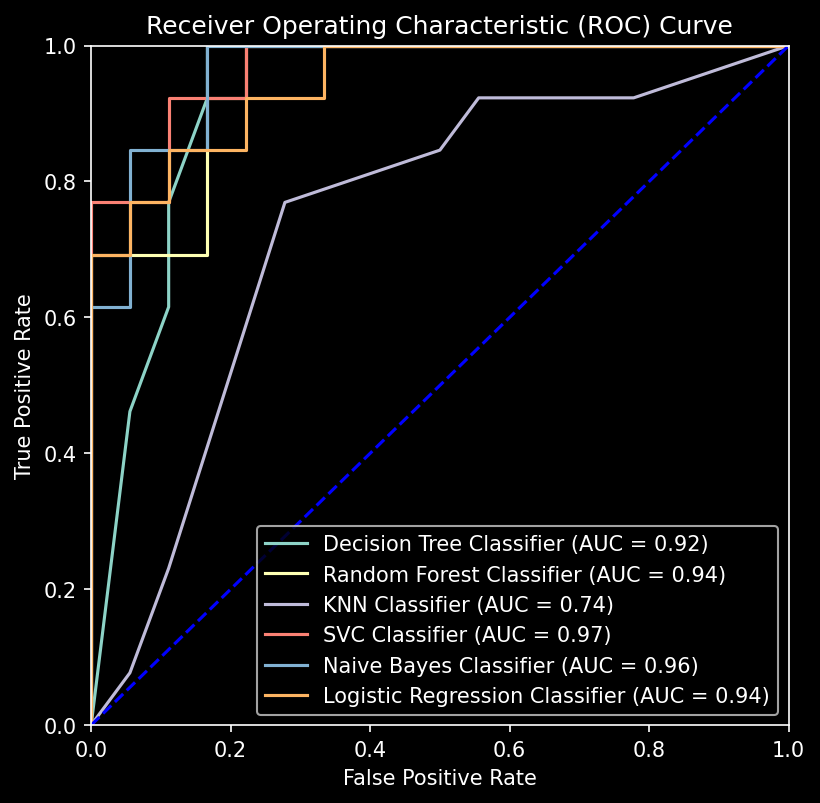

In [33]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
RocCurveDisplay(fpr=fpr_dt, tpr=tpr_dt, roc_auc=roc_auc_dt, estimator_name='Decision Tree Classifier').plot(ax=ax)
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name='Random Forest Classifier').plot(ax=ax)
RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=roc_auc_knn, estimator_name='KNN Classifier').plot(ax=ax)
RocCurveDisplay(fpr=fpr_svc, tpr=tpr_svc, roc_auc=roc_auc_svc, estimator_name='SVC Classifier').plot(ax=ax)
RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, roc_auc=roc_auc_nb, estimator_name='Naive Bayes Classifier').plot(ax=ax)
RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=roc_auc_lr, estimator_name='Logistic Regression Classifier').plot(ax=ax)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("../media/ROC_curve.png", bbox_inches='tight')

## Model Evaluation

In [34]:
model_evaluation = pd.DataFrame(columns=['Model', 'Accuracy'])
model_evaluation['Model'] = ['Decision Tree', 'Random Forest', 'KNN', 'SVC', 'Naive Bayes', 'Logistic Regression']
model_evaluation['Accuracy'] = [dt_acc, rf_acc, knn_acc, svc_acc, nb_acc, lr_acc]
model_evaluation.sort_values(by='Accuracy', ascending=False, inplace=True)
model_evaluation

,Model,Accuracy
0,Decision Tree,0.870968
3,SVC,0.838710
4,Naive Bayes,0.838710
1,Random Forest,0.806452
5,Logistic Regression,0.806452
2,KNN,0.645161


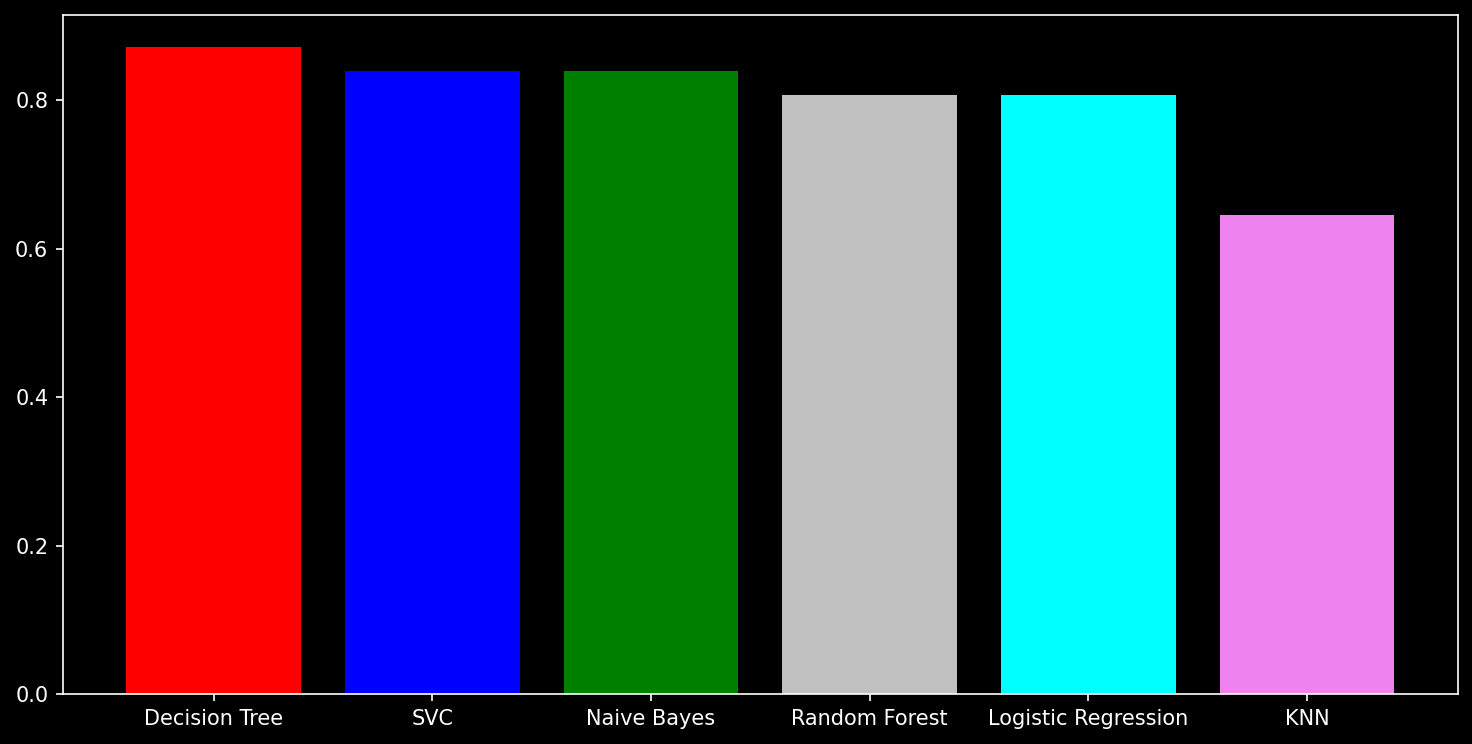

In [35]:
pal=['red','blue','green','silver','cyan','violet']
plt.figure(figsize=(12, 6), dpi=150)
plt.style.use('dark_background')
plt.bar(model_evaluation['Model'], model_evaluation['Accuracy'], color=pal)
plt.savefig("../media/accuracy_barplot.png", bbox_inches='tight')

## Saving the best model

In [37]:
dump(dt, 'dt_model.joblib')

['dt_model.joblib']